# EVALUATION OF MODEL PERFORMANCE
## METHOD 1: RESIDUAL ANALYSIS
With this method we basically plot the difference between the predicted target data vs the real target data and visualize how far it is from zero.<br /> Where 0 is the ideal case whjere the predicted value is exactly the same as the real one

## Load dataset into pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import RANSACRegressor as ransac

In [2]:
cNames=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing.data',sep='\s+',names=cNames)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Split the data into training data and testing data
we are going to use the rooms per dwelling parameter in this case

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=df['RM'].values
y=df['MEDV'].values
X=x.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Create and fit the models

In [7]:
lr_model=LR()
rr_model=ransac()

In [8]:
lr_model.fit(X_train,y_train)
rr_model.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [9]:
lr_y_train_pred=lr_model.predict(X_train)
lr_y_test_pred=lr_model.predict(X_test)
rr_y_train_pred=rr_model.predict(X_train)
rr_y_test_pred=rr_model.predict(X_test)

# Residual Analysis
This plots the predicted values against the real values in the following way:<br />
x_axis = predicted target values<br />
y_axis = predicted target values - real target values<br />
the feature is not plotted here, only the class/target<br />
How to interpret:<br />
-since we are substracting the real from the predicted, we get to see how good/pad the predictions are, an ideal prediction would result in a 0 value on the y_axis for every point.<br />
-We plot against the predicted target values because that way we can each target and determine which ones behave best/worst in the regression model.

### Linear Regression

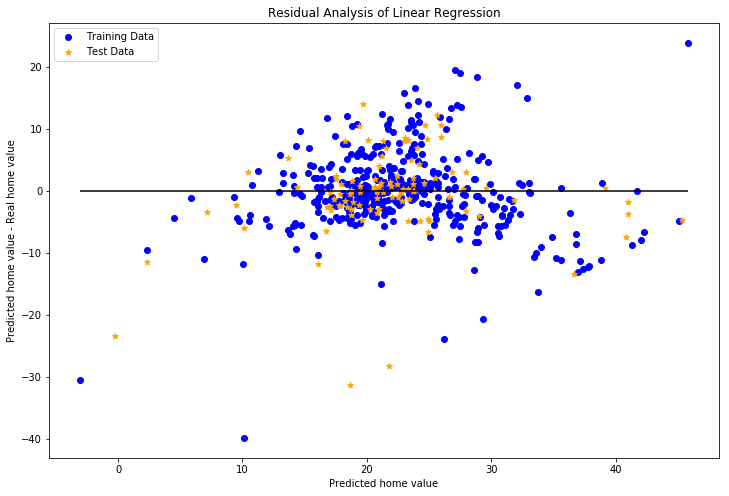

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(lr_y_train_pred,lr_y_train_pred-y_train,color='blue',marker='o',label='Training Data')
plt.scatter(lr_y_test_pred,lr_y_test_pred-y_test,color='orange',marker='*',label='Test Data')
plt.xlabel('Predicted home value')
plt.ylabel('Predicted home value - Real home value')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=np.min([lr_y_train_pred.min(),lr_y_test_pred.min()]),
           xmax=np.max([lr_y_train_pred.max(),lr_y_test_pred.max()]))
plt.title('Residual Analysis of Linear Regression')
plt.show()

### RANSAC Robust Regression

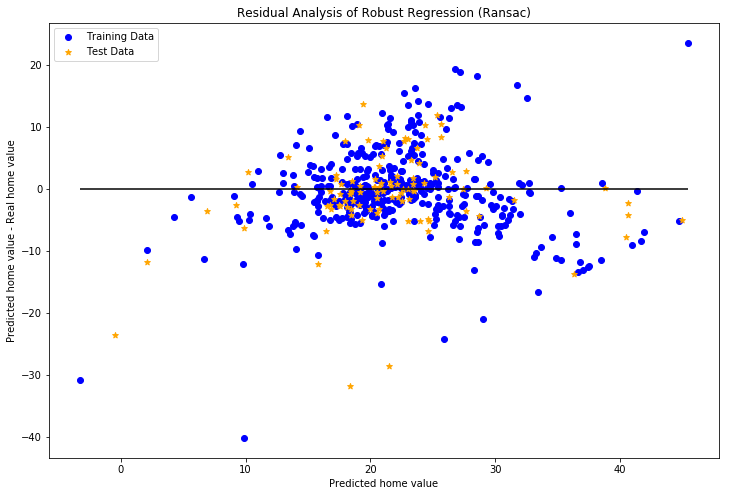

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(rr_y_train_pred,rr_y_train_pred-y_train,color='blue',marker='o',label='Training Data')
plt.scatter(rr_y_test_pred,rr_y_test_pred-y_test,color='orange',marker='*',label='Test Data')
plt.xlabel('Predicted home value')
plt.ylabel('Predicted home value - Real home value')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=np.min([rr_y_train_pred.min(),rr_y_test_pred.min()]),
           xmax=np.max([rr_y_train_pred.max(),rr_y_test_pred.max()]))
plt.title('Residual Analysis of Robust Regression (Ransac)')
plt.show()